In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv('/content/green_tech_data.csv')
print(df)

    carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0         181.089042     128.286267            0.642032         0.732568   
1         382.750007     672.769370            0.084140         2.891096   
2         306.197880     382.920383            0.161629         2.932858   
3         259.530469     557.713622            0.898554         3.368435   
4         104.606524     916.809827            0.606429         3.767411   
..               ...            ...                 ...              ...   
95        222.828459     414.288617            0.522243         4.688408   
96        232.956490     753.360111            0.769994         4.362857   
97        199.639356     907.399234            0.215821         2.430473   
98         58.896694     898.377782            0.622890         3.878920   
99         87.761999     801.887991            0.085347         3.895443   

    sustainability  
0                1  
1                0  
2                0  
3  

In [6]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [7]:
df.isnull()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


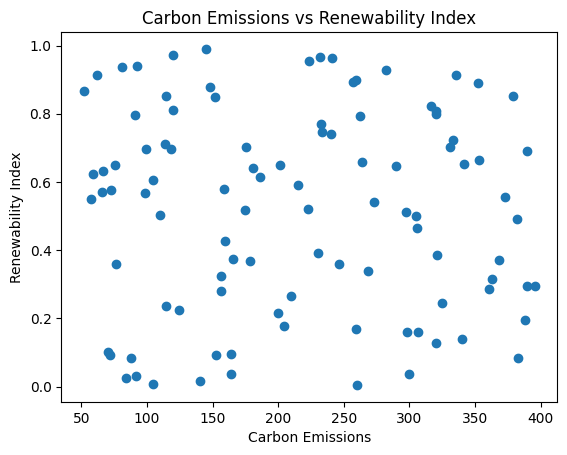

In [24]:
x=df['carbon_emissions']
y=df['renewability_index']
plt.scatter(x,y)
plt.title('Carbon Emissions vs Renewability Index')
plt.xlabel('Carbon Emissions')
plt.ylabel('Renewability Index')
plt.show()

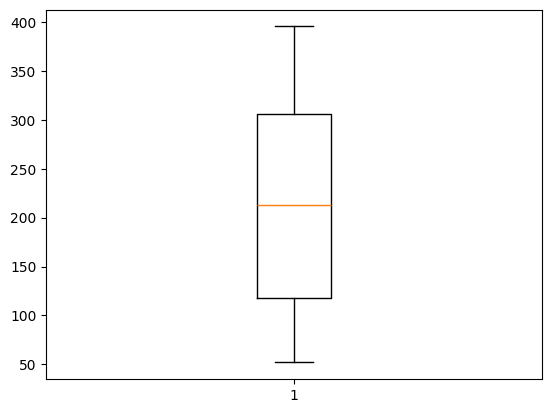

In [15]:
plt.boxplot(df['carbon_emissions'])
plt.show()

In [19]:
class_distribution = df['sustainability'].value_counts()
print(class_distribution)

sustainability
0    85
1    15
Name: count, dtype: int64


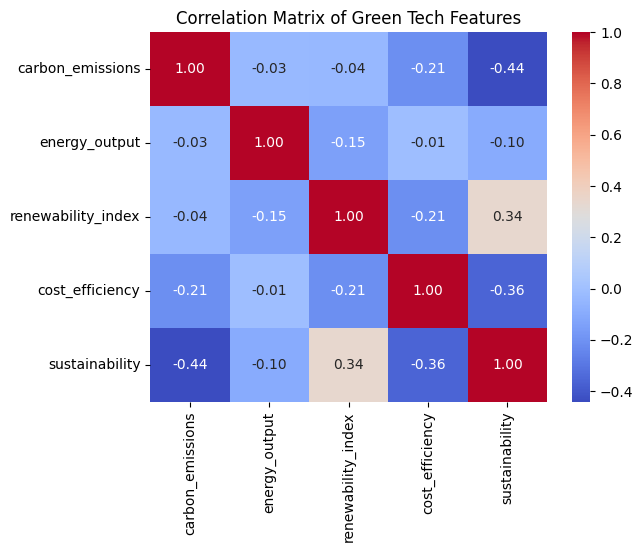

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Green Tech Features')
plt.show()

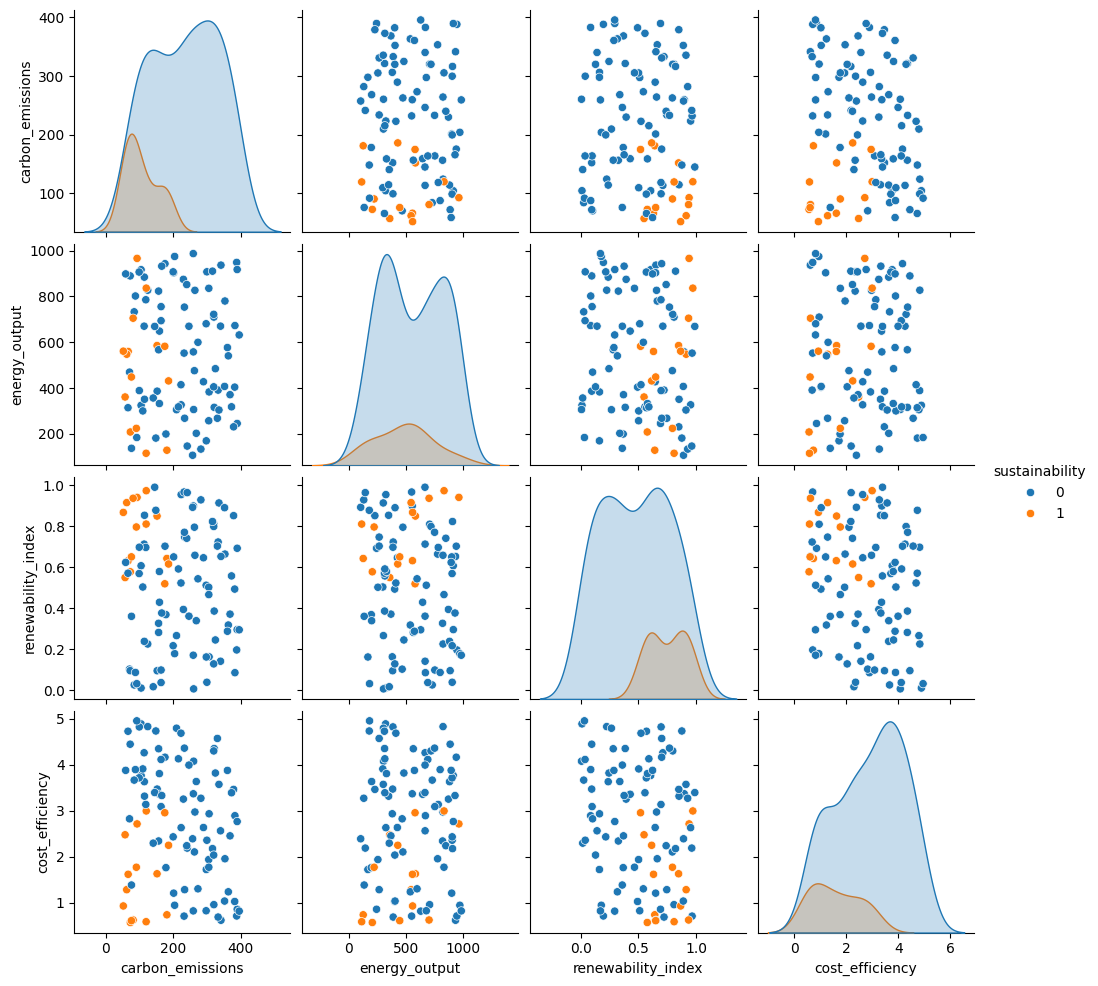

In [21]:
sns.pairplot(df, hue='sustainability')
plt.show()

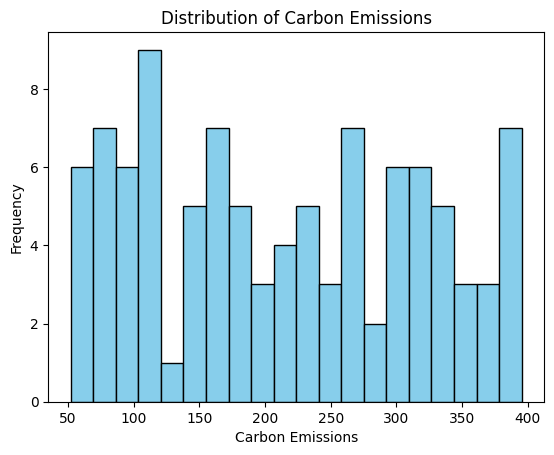

In [22]:
plt.hist(df['carbon_emissions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emissions')
plt.ylabel('Frequency')
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[['carbon_emissions', 'renewability_index']], df['sustainability'], test_size=0.2, random_state=42)

In [26]:
x_train.head()

,carbon_emissions,renewability_index
55,372.655982,0.556801
88,360.524460,0.286541
26,119.885824,0.973011
42,62.035982,0.914864
69,395.410428,0.293592


In [28]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [39]:
coefficient_df = pd.DataFrame(model.coef_.T, index=x_train.columns, columns=['Coefficient'])
coefficient_df

,Coefficient
carbon_emissions,-0.020928
renewability_index,1.580292


In [40]:
import joblib
joblib.dump(model,'Logistic model sustainability.pkl')

['Logistic model sustainability.pkl']